In [1]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt

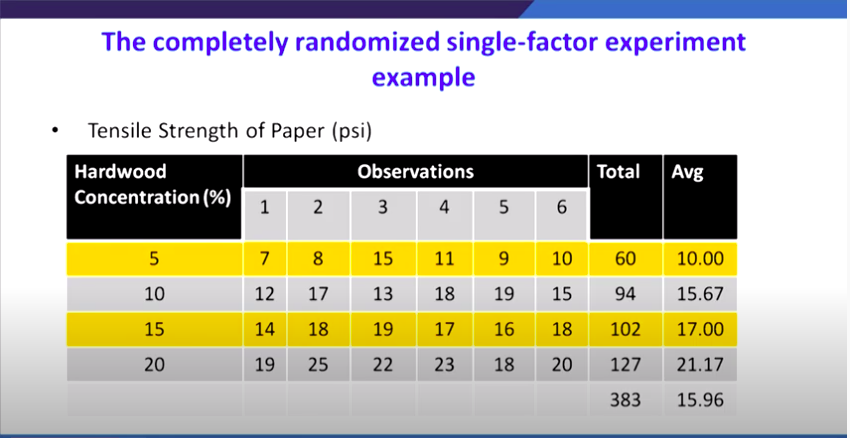

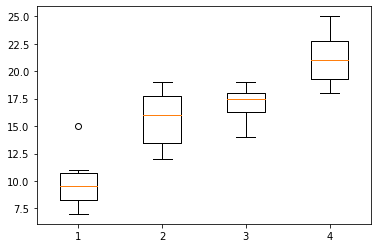

In [2]:
five_percent=[7,8,15,11,9,10]
ten_percent=[12,17,13,18,19,15]
fifteen_percent=[14,18,19,17,16,18]
twenty_percent=[19,25,22,23,18,20]
box_plot_data=[five_percent,ten_percent,fifteen_percent,twenty_percent]
plt.boxplot(box_plot_data)
plt.show()

In [3]:
result=stats.f_oneway(five_percent,ten_percent,fifteen_percent,twenty_percent)
print(result)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)


In [4]:
stats.f.ppf(1-0.01,3,20)

4.938193382310539

In [5]:
# Since, z value is more than the permissible z we reject the null hypothesis

In [6]:
import numpy as np
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [7]:
data=pd.read_csv('paperbagtensile.csv')
data

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [8]:
data_new=pd.melt(data.reset_index(),id_vars=['index'],value_vars=['concentration5','concentration10','concentration15','concentration20'])
data_new.columns=['index','treatments','value']
data_new.head()

,index,treatments,value
0,0,concentration5,7
1,1,concentration5,8
2,2,concentration5,15
3,3,concentration5,11
4,4,concentration5,9


In [9]:
model=ols('value ~ C(treatments)',data=data_new).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.59e-06
Time:                        18:54:44   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
anova_table=sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


In [12]:
stats.t.ppf(0.025,20)

-2.085963447265837

In [13]:
t=-1*stats.t.ppf(0.025,20)
n=6
MSE=6.508333
lsd=t*np.sqrt(2*MSE/n)
lsd

3.072422588325206

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
mc=MultiComparison(data_new.value,data_new.treatments)
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
concentration10,concentration15,1.3333,0.7827,-2.7894,5.4561,False
concentration10,concentration20,5.5,0.0066,1.3773,9.6227,True
concentration10,concentration5,-5.6667,0.0051,-9.7894,-1.5439,True
concentration15,concentration20,4.1667,0.047,0.0439,8.2894,True
concentration15,concentration5,-7.0,0.001,-11.1227,-2.8773,True
concentration20,concentration5,-11.1667,0.001,-15.2894,-7.0439,True


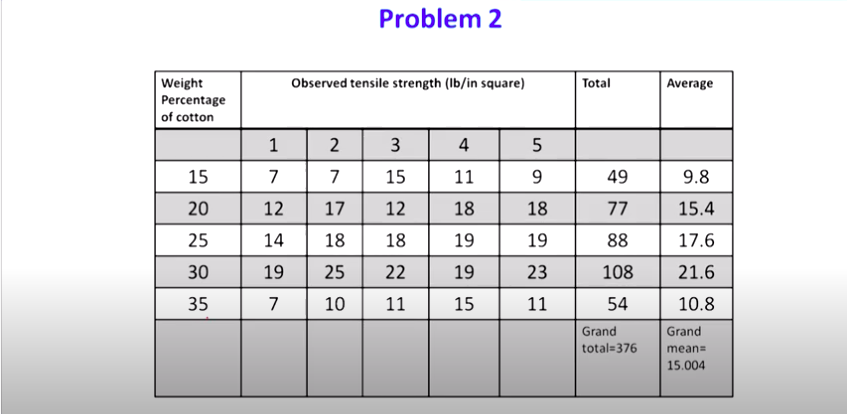

In [16]:
data={'cotton15':[7,7,15,11,9],'cotton20':[12,17,12,18,18],'cotton25':[14,18,18,19,19],'cotton30':[19,25,22,19,23],'cotton35':[7,10,11,15,11]}
data=pd.DataFrame(data)
data

,cotton15,cotton20,cotton25,cotton30,cotton35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


In [19]:
data_new=pd.melt(data.reset_index(),id_vars=['index'],value_vars=data.columns)
data_new.columns=['index','treatments','value']
data_new

,index,treatments,value
0,0,cotton15,7
1,1,cotton15,7
2,2,cotton15,15
3,3,cotton15,11
4,4,cotton15,9
5,0,cotton20,12
6,1,cotton20,17
7,2,cotton20,12
8,3,cotton20,18
9,4,cotton20,18


In [21]:
model=ols('value ~ C(treatments)',data=data_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     14.76
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           9.13e-06
Time:                        19:24:00   Log-Likelihood:                -58.771
No. Observations:                  25   AIC:                             127.5
Df Residuals:                      20   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     9.8000      1.270      7.719      0.000       7.152      12.448
C(treatments)[T.cotton20]     5.6000      1.796      3.119      0.005       1.855       9.345
C(treatments)[T.cotton25]     7.8000      1.796      4.344      0.000       4.055      11.545
C(treatments)[T.cotton30]    11.8000      1.796      6.572      0.000       8.055      15.545
C(treatments)[T.cotton35]     1.0000      1.796      0.557      0.584      -2.745       4.745
==============================================================================
Omnibus:                        1.435   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.957
Skew:                           0.106   Prob(JB):                        0.620
Kurtosis:                       2.065   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
anova_table=sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),4.0,475.76,118.94,14.756824,0.000009
Residual,20.0,161.20,8.06,NaN,NaN


In [23]:
stats.f.ppf(0.95,4,20)

2.8660814020156584

In [24]:
# We reject null hypothesis

In [25]:
mc=MultiComparison(data_new.value,data_new.treatments)
mc_result=mc.tukeyhsd(0.05)
mc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cotton15,cotton20,5.6,0.0385,0.2266,10.9734,True
cotton15,cotton25,7.8,0.0026,2.4266,13.1734,True
cotton15,cotton30,11.8,0.001,6.4266,17.1734,True
cotton15,cotton35,1.0,0.9,-4.3734,6.3734,False
cotton20,cotton25,2.2,0.7148,-3.1734,7.5734,False
cotton20,cotton30,6.2,0.0189,0.8266,11.5734,True
cotton20,cotton35,-4.6,0.1165,-9.9734,0.7734,False
cotton25,cotton30,4.0,0.2102,-1.3734,9.3734,False
cotton25,cotton35,-6.8,0.0091,-12.1734,-1.4266,True
cotton30,cotton35,-10.8,0.001,-16.1734,-5.4266,True
